In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
df = pd.read_csv("Ecommerce Customers")

In [18]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [19]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [20]:
df.shape

(500, 8)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


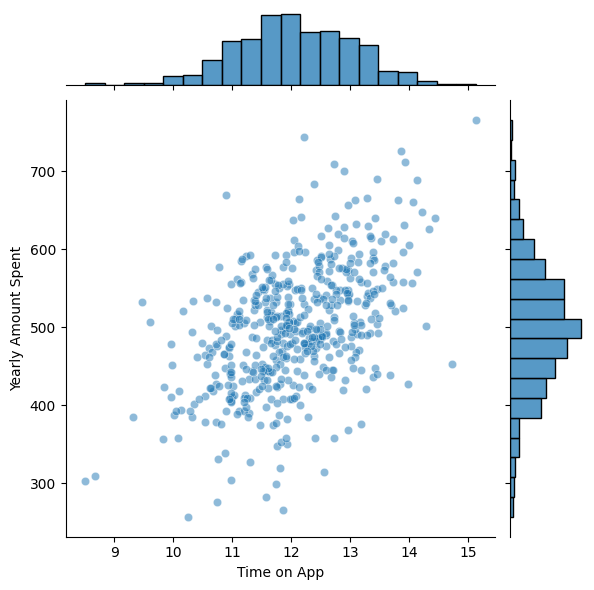

In [24]:
sns.jointplot(x = 'Time on App' , y = 'Yearly Amount Spent', data = df, alpha = 0.5)

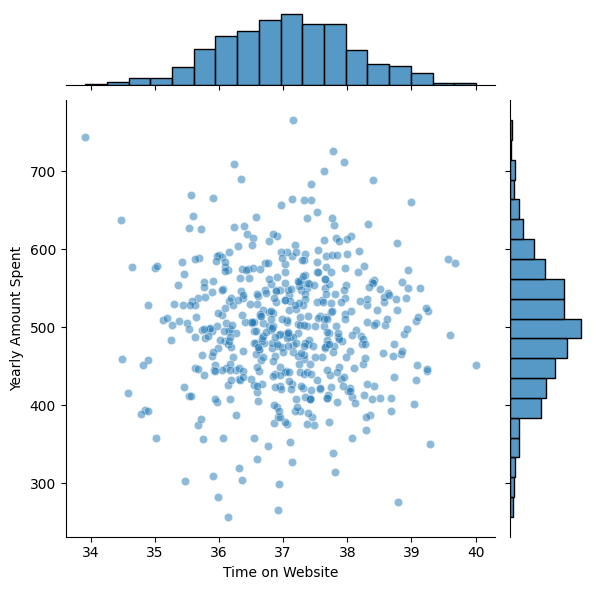

In [25]:
sns.jointplot(x = 'Time on Website' , y = 'Yearly Amount Spent', data = df, alpha = 0.5)

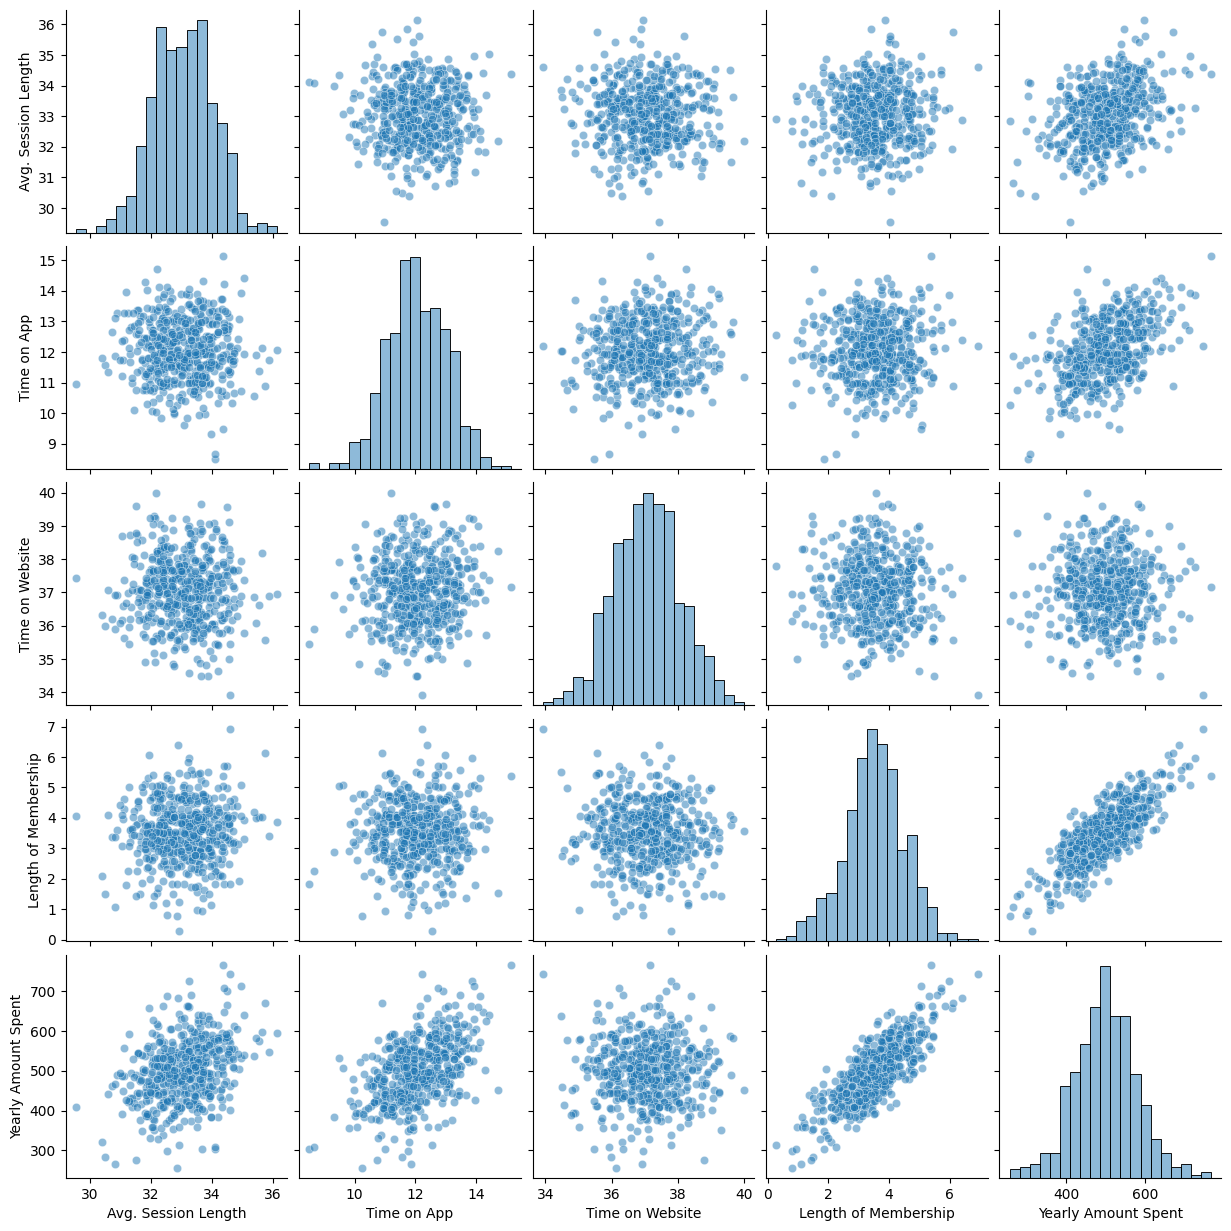

In [28]:
sns.pairplot(df, kind = 'scatter', 
            plot_kws = {'alpha' : 0.5}, 
            diag_kws = {'alpha' : 0.5, 'bins' :20})

Length of Membership seems to have the strongest correlation of all variables with Amount Spent

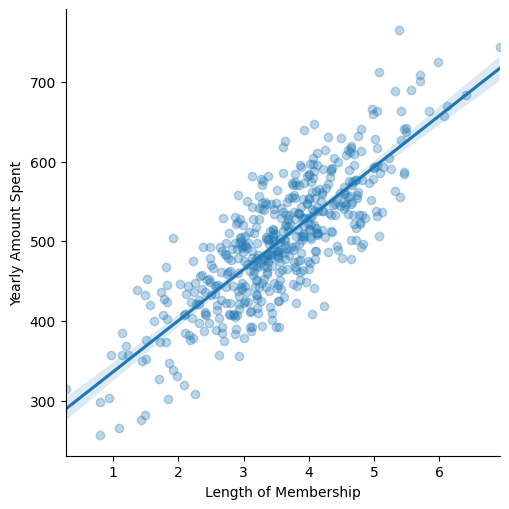

In [31]:
sns.lmplot(data = df, x = "Length of Membership", y = "Yearly Amount Spent",
           scatter_kws = {'alpha' : 0.3})

In [32]:
from sklearn.model_selection import train_test_split

In [34]:
X = df[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]
y = df['Yearly Amount Spent']

In [35]:
X.head()
y.head()

0    587.951054
1    392.204933
2    487.547505
3    581.852344
4    599.406092
Name: Yearly Amount Spent, dtype: float64

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)


In [37]:
from sklearn.linear_model import LinearRegression

In [38]:
lm = LinearRegression()

In [39]:
lm.fit(X_train, y_train)

LinearRegression()

In [40]:
lm.coef_

array([25.72425621, 38.59713548,  0.45914788, 61.67473243])

In [41]:
lm.score(X, y)

0.9842821675307222

In [43]:
coef = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficients'])
print(coef)

                      Coefficients
Avg. Session Length      25.724256
Time on App              38.597135
Time on Website           0.459148
Length of Membership     61.674732


In [48]:
import statsmodels.api as sm

In [49]:
X = sm.add_constant(X_train)
model = sm.OLS(y_train, X)
model_fit = model.fit()
print(model_fit.summary())

                             OLS Regression Results                            
Dep. Variable:     Yearly Amount Spent   R-squared:                       0.985
Model:                             OLS   Adj. R-squared:                  0.985
Method:                  Least Squares   F-statistic:                     5825.
Date:                 Fri, 20 Oct 2023   Prob (F-statistic):          3.46e-315
Time:                         12:42:02   Log-Likelihood:                -1296.2
No. Observations:                  350   AIC:                             2602.
Df Residuals:                      345   BIC:                             2622.
Df Model:                            4                                         
Covariance Type:             nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -

In [50]:
predictions = lm.predict(X_test)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Yearly Amount Spent vs. Model Predictions')

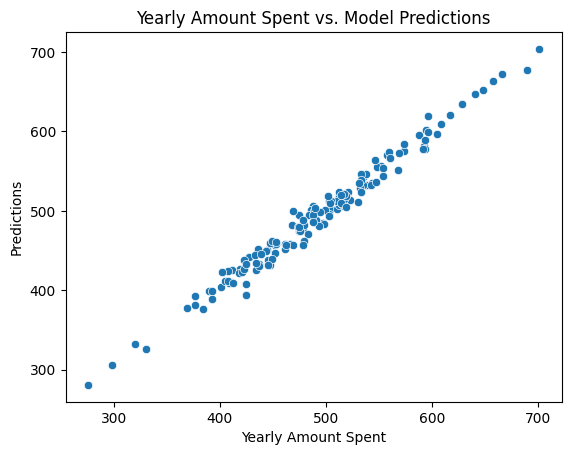

In [61]:
sns.scatterplot(y_test, predictions)
plt.ylabel('Predictions')
plt.title('Yearly Amount Spent vs. Model Predictions')

In [52]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

In [56]:
print('Mean Absolute Error:',mean_absolute_error(y_test, predictions))
print('Mean Squared Error:',mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:',math.sqrt(mean_squared_error(y_test, predictions)))


Mean Absolute Error: 8.426091641432063
Mean Squared Error: 103.9155413650328
Root Mean Squared Error: 10.193897260863128


<AxesSubplot:xlabel='Yearly Amount Spent', ylabel='Count'>

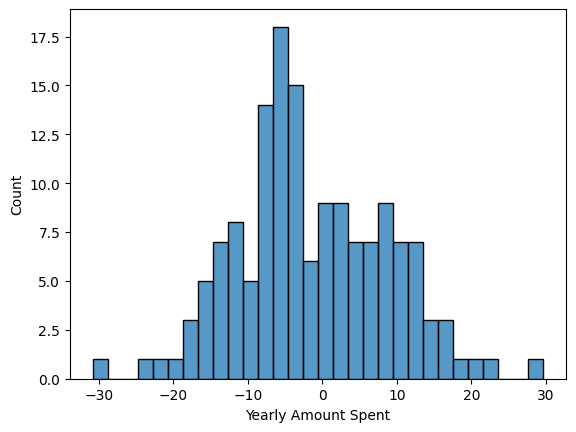

In [60]:
residuals = y_test-predictions
sns.histplot(residuals, bins=30)

In [63]:
import pylab 
import scipy.stats as stats

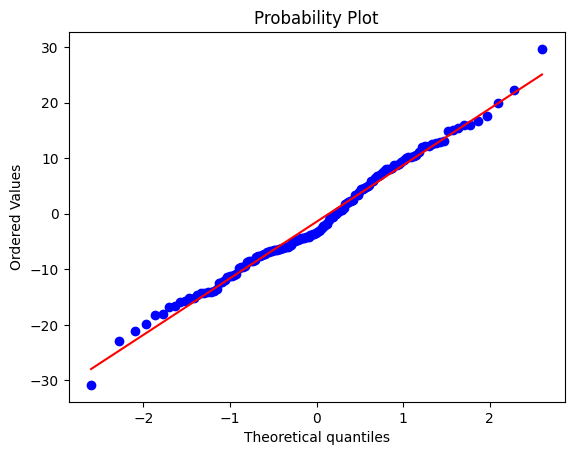

In [64]:
stats.probplot(residuals, dist="norm", plot=pylab)
pylab.show()